In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [1]:
path = r"Data\LS2009Electors.csv"
path1 = r"Data\candidate09.csv"

In [3]:
electors_2009 = pd.read_csv(path)
candidate_2009 = pd.read_csv(path1)

In [43]:
electors_2009.head()

,STATE CODE,STATE,PC NO,PARLIAMENTARY CONSTITUENCY,Total voters,Total_Electors,TOT_CONTESTANT,POLL PERCENTAGE
0,S01,Andhra Pradesh,1,Adilabad,864165,1131211,9,76.39
1,S01,Andhra Pradesh,2,Peddapalle,905332,1315642,15,68.81
2,S01,Andhra Pradesh,3,Karimnagar,990646,1496211,15,66.21
3,S01,Andhra Pradesh,4,Nizamabad,891508,1333271,12,66.87
4,S01,Andhra Pradesh,5,Zahirabad,1017372,1359566,10,74.83


In [50]:
candidate_2009.head()

,ST_CODE,State_name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_Votes_Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP


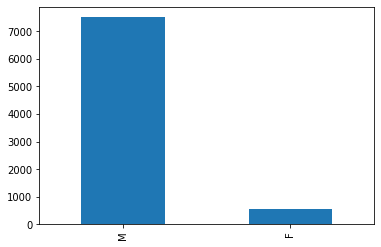

In [12]:
candidate_2009.Candidate_Sex.value_counts().plot(kind="bar")

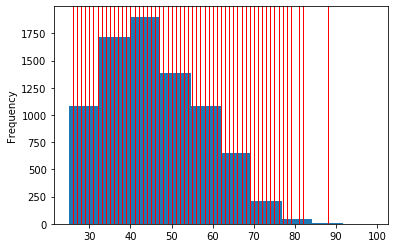

In [26]:
candidate_2009.Candidate_Age.plot(kind="hist")
for age in candidate_2009[candidate_2009.Position==1]["Candidate_Age"]:
    plt.axvline(age, color='red', linewidth=1)

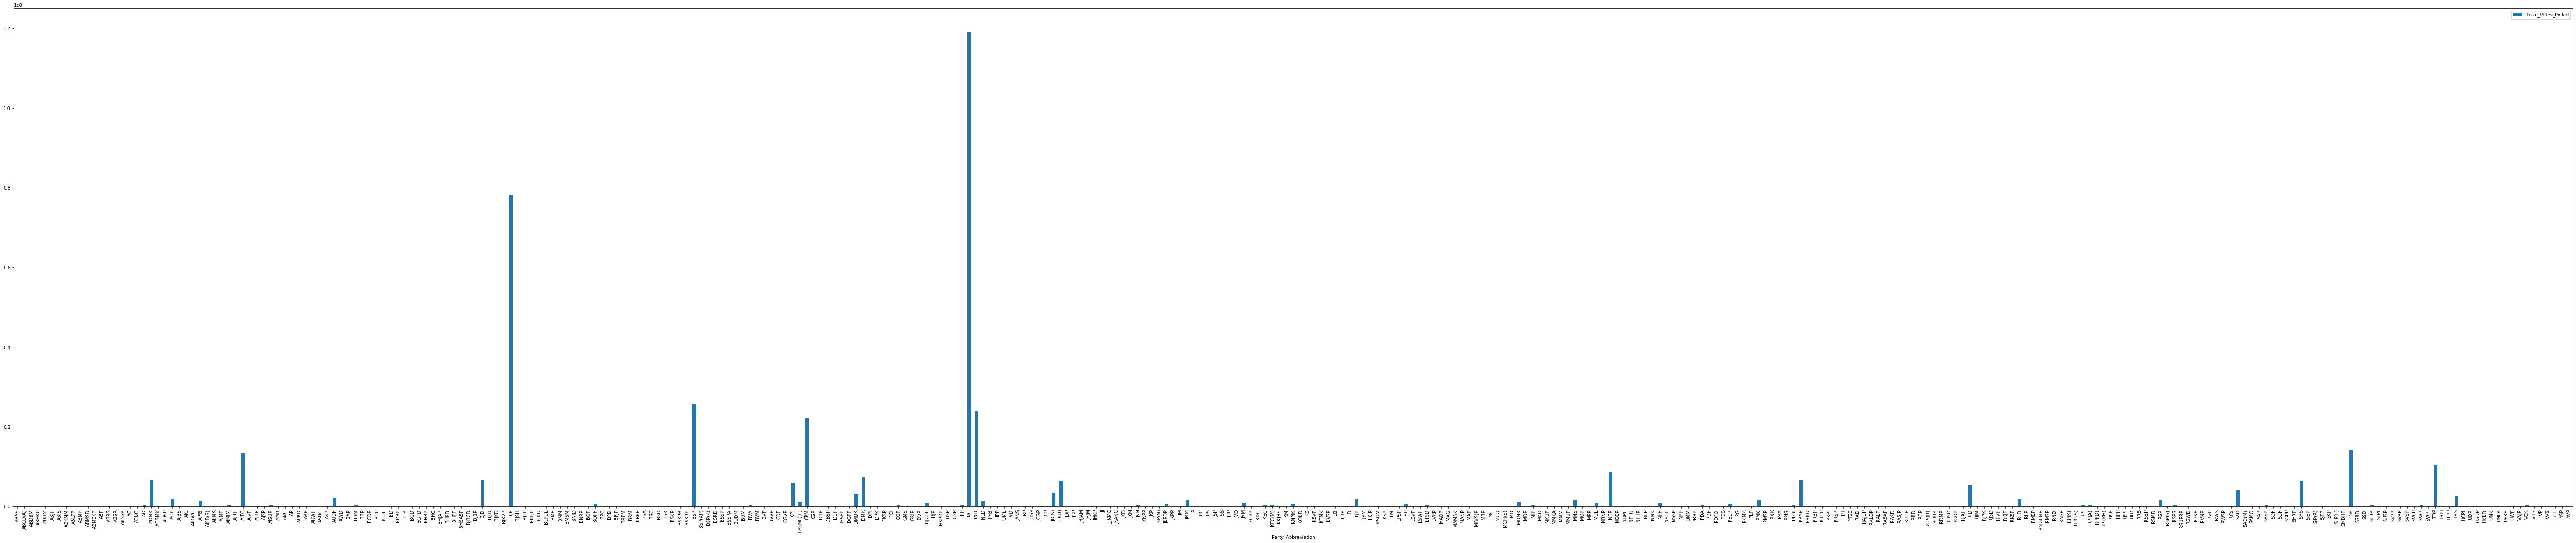

In [40]:
candidate_2009.groupby("Party_Abbreviation")[["Total_Votes_Polled"]].sum().plot(kind="bar", figsize=[100,20])

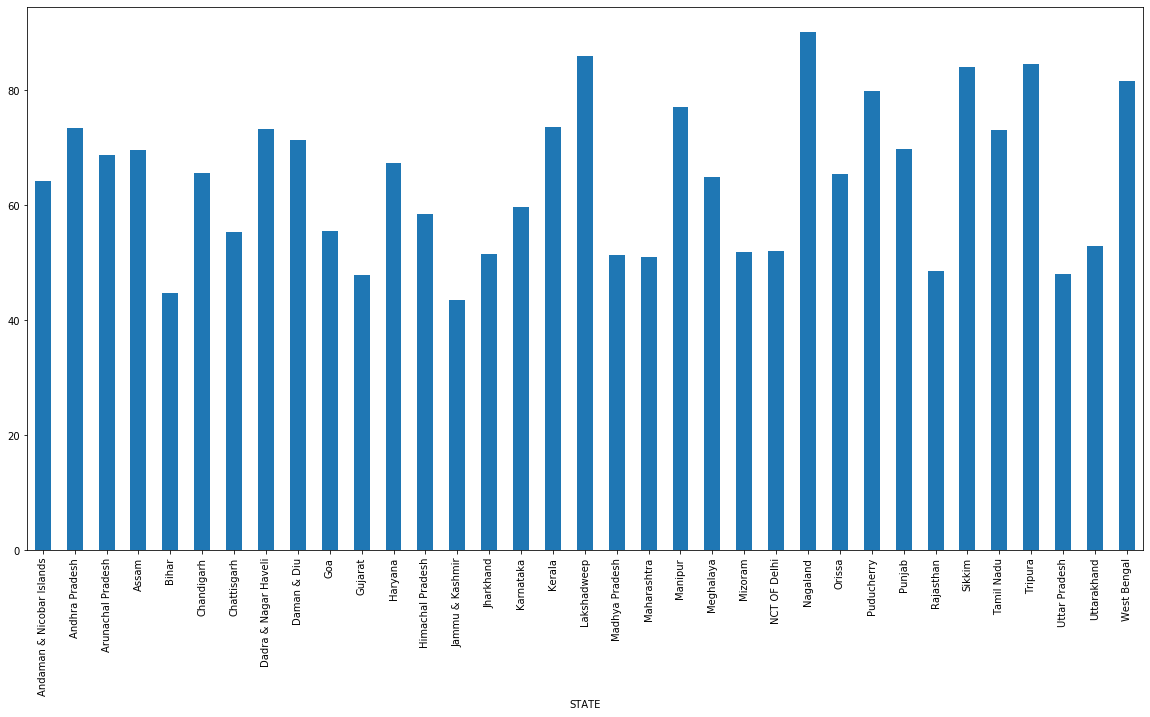

In [49]:
electors_2009.groupby(by="STATE")["POLL PERCENTAGE"].mean().plot(kind="bar",figsize=[20, 10])

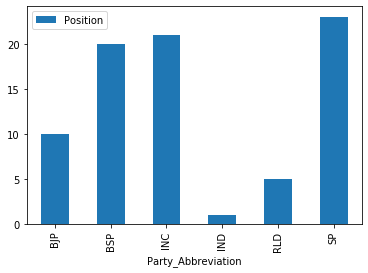

In [56]:
candidate_2009[(candidate_2009.State_name=="Uttar Pradesh") & (candidate_2009.Position==1)].groupby("Party_Abbreviation")[["Position"]].count().plot(kind="bar")

In [61]:
win = candidate_2009[((candidate_2009.State_name=="Madhya Pradesh")|(candidate_2009.State_name=="Gujarat")|(candidate_2009.State_name=="Maharashtra")) & (candidate_2009.Position==1)]

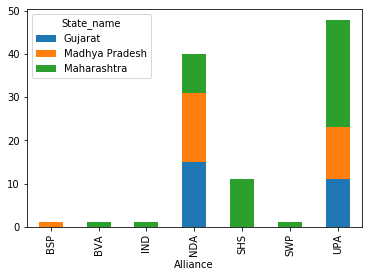

In [67]:
win.pivot_table(index="Alliance", columns="State_name", aggfunc="count", values="Position").plot(kind="bar", stacked=True)

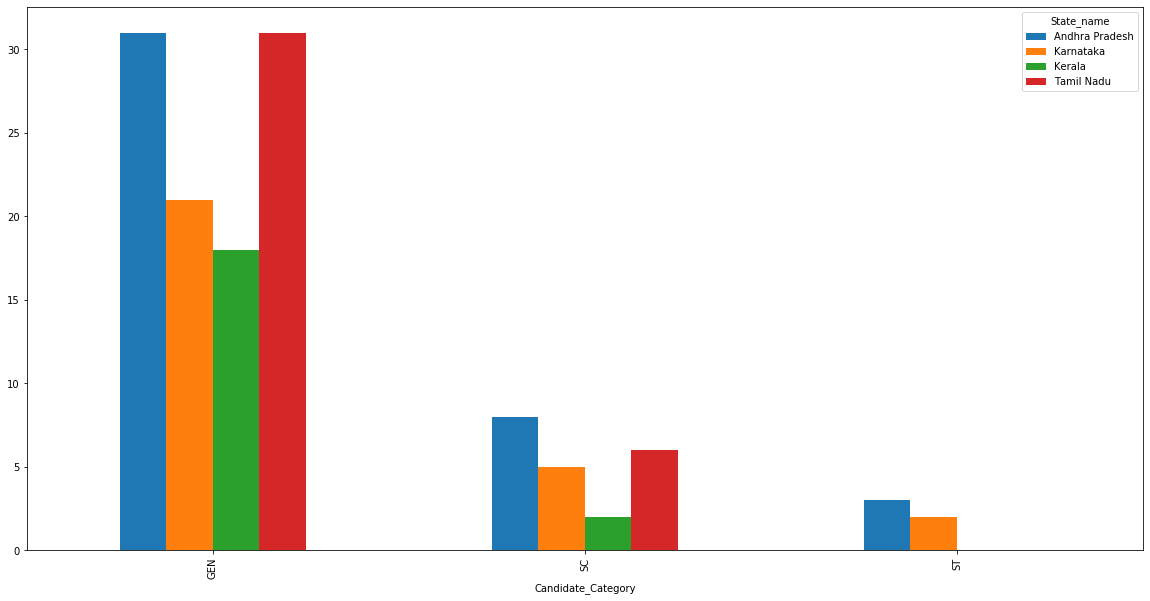

In [70]:
win = candidate_2009[((candidate_2009.State_name=="Andhra Pradesh")|(candidate_2009.State_name=="Kerala")|(candidate_2009.State_name=="Tamil Nadu")|(candidate_2009.State_name=="Karnataka")) & (candidate_2009.Position==1)]
win.pivot_table(index="Candidate_Category", columns="State_name", aggfunc="count", values="Position").plot(kind="bar", figsize=[20,10])

In [90]:
less = electors_2009[electors_2009.Total_Electors<100000]

In [91]:
less.index = less.STATE
less = less[["Total_Electors"]]

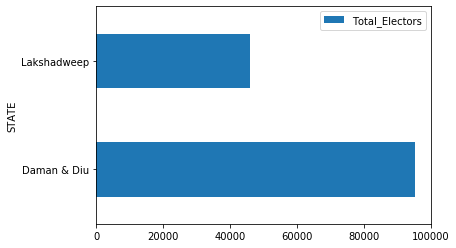

In [93]:
less.plot(kind="barh")

In [103]:
top_10 = candidate_2009[candidate_2009.Position==1].groupby("Party_Abbreviation")[["Position"]].count().sort_values(by="Position", ascending=False).head(10)

([<matplotlib.patches.Wedge at 0x2866d7d6710>,
 [Text(0.1893793213597494, 1.083575319320868, 'INC'),
  Text(-0.9947369593652229, -0.46957255208628934, 'BJP'),
  Text(-0.20406615045173365, -1.0809056416911749, 'SP'),
  Text(0.12289610323718421, -1.0931132364989071, 'BSP'),
  Text(0.41836460021107125, -1.0173352747694493, 'JD(U)'),
  Text(0.6698843275393306, -0.872499276628456, 'AITC'),
  Text(0.8610109664383726, -0.6845875515029908, 'DMK'),
  Text(0.9915279468560381, -0.4763111699335318, 'CPM'),
  Text(1.0673453722100796, -0.26603356258511174, 'BJD'),
  Text(1.096937446945712, -0.08202583427325315, 'SHS')])

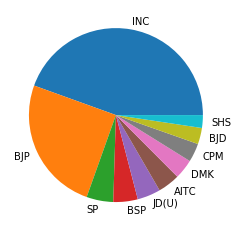

In [107]:
plt.pie(top_10, labels=top_10.index)

([<matplotlib.patches.Wedge at 0x2866d80ab00>,
 [Text(0.8608370229524398, 0.6848062645116361, 'Uttar Pradesh'),
  Text(-0.19303475629308223, 1.0829300914015043, 'Maharashtra'),
  Text(-0.8833562113837671, 0.6555011852084767, 'West Bengal'),
  Text(-1.0975172383622454, -0.07386414216459065, 'Andhra Pradesh'),
  Text(-0.8003458620498494, -0.7546167908943476, 'Bihar'),
  Text(-0.1656867031435134, -1.0874501903082427, 'Tamil Nadu'),
  Text(0.4485354290561421, -1.0043983118670714, 'Madhya Pradesh'),
  Text(0.8608369588362459, -0.6848063451090123, 'Karnataka'),
  Text(1.073870004653088, -0.2383342466083647, 'Gujarat')])

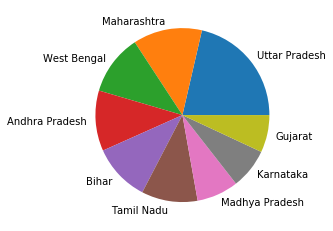

In [117]:
top_9 = candidate_2009[["State_name", "PC_name"]].drop_duplicates().groupby("State_name").count().sort_values("PC_name", ascending=False).head(9)
plt.pie(top_9, labels=top_9.index)